<a href="https://colab.research.google.com/github/udaykbce/Netflix_Movies_and_TV_shows2/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_uk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

**CONTENT**

* Introduction 
* Importing libraries
* Data Wrangling
* Exploratory Data Analysis
* Data preprocessing
    * Wordcloud
    * Removing Stopwords 
    * Removing Punctuation
    * Stemming
* Clustring
    * PCA
    * Elbow and Silhouette Method
    * K-Means Clustring 
* Inference



**Introduction**



Netflix employs data science to always provide us with the appropriate content. They categorise all of the information that people in specific area are now seeing using a clustering and classification algorithm. Also, they employ a recommender system to predicts a person's preferences in the future given a specific quantity of sparse data.


#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading our dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone4/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

There are 12 columns in the given dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Here no duplicate value present in the given dataset.

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Total count of null value
df.isnull().sum().sum()

3631

Here in given dataset a total of 3631 null value present in which director has the most number of null values then cast has 718 null values then country has 507 null values then date_added has 10 and rating has 7 null values.

**Managing Null Values**

In [ ]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
df['cast'].fillna(value='unknown',inplace=True)
df['country'].fillna(value=df['country'].mode(),axis=0,inplace=True)
df['director'].fillna(value='not_available',inplace=True)

In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,not_available,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,not_available,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Rows of column 'date_added' and 'rating' having null values which can not be filled by mean value or frequent value.

In [ ]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         505
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

**EDA Part**

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


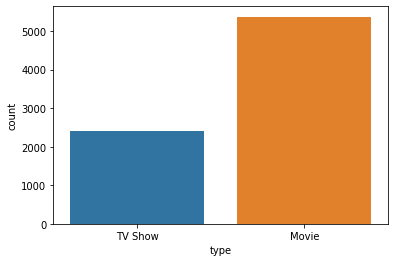

In [ ]:
sns.countplot(df['type'])

Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.




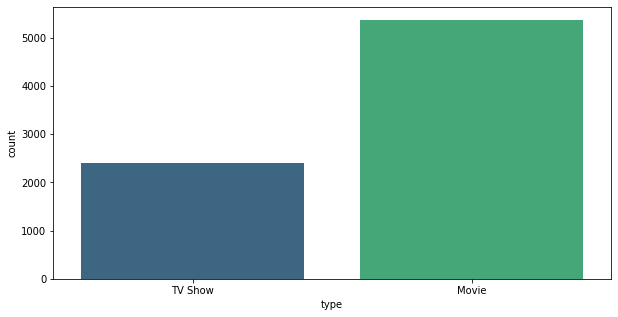

In [ ]:
a,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df, x="type",palette="viridis",ax=ax)
plt.show()

In [ ]:
df['country'].value_counts().reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
index,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2546,923,396,224,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


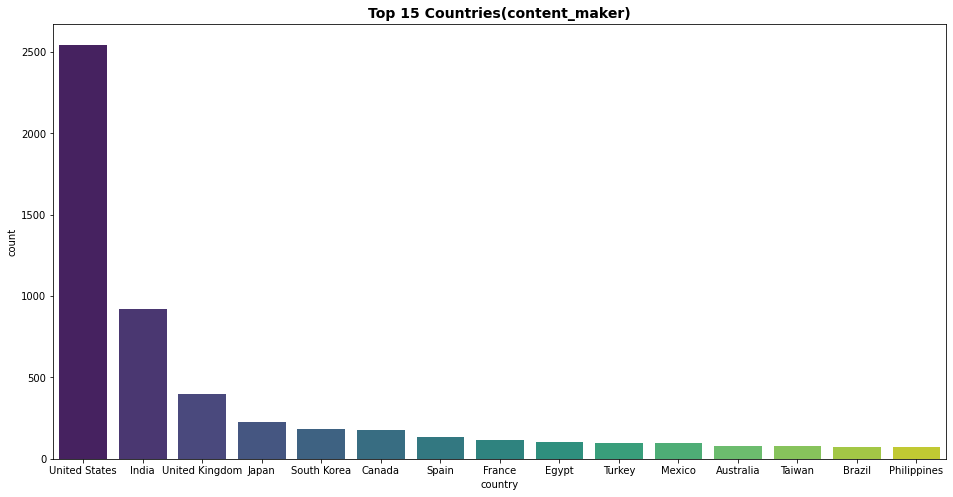

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Top 15 Countries(content_maker)',size='14', fontweight='bold')
sns.countplot(x='country', data=df, palette='viridis', order=df['country'].value_counts().index[0:15])

United states has the highest number of content on the netflix ,followed by India, United Kingdom and so on. 

In [ ]:
df['date_added'].head()

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # add day.
df['year_added'] = df['date_added'].dt.year          # add year.
df['month_added'] = df['date_added'].dt.month        # add date.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,not_available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


**Director**

In [ ]:
directors= df.director.value_counts().reset_index().head(25)[1:]             # not taking 'not_available' rows
directors.rename(columns={'index':'directors_name', 'director':'Count'}, inplace=True)
fig = px.bar(directors, x='directors_name', y='Count', text_auto=True,
             color='Count')
fig.update_layout(
    title={
        'text': 'Top 25 directors making highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()

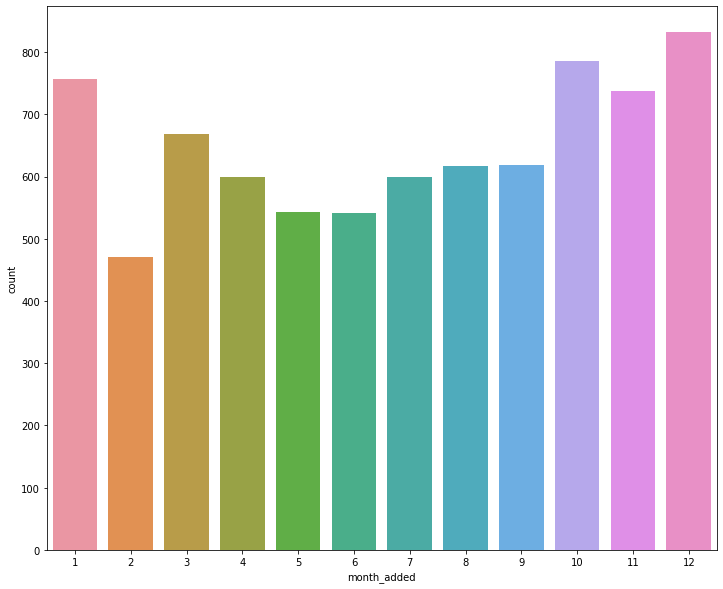

In [ ]:
plt.figure(figsize=(12,10))
ax=sns.countplot(data=df, x='month_added')
plt.show()

*Most of the content is uploaded either by year ending or beginning.*
*October, November, December, and January are months in which many shows and movies get uploaded to the platform.*
*It might be due to the winter, as in these months people may stay at home and watch shows and movies in their free time.*

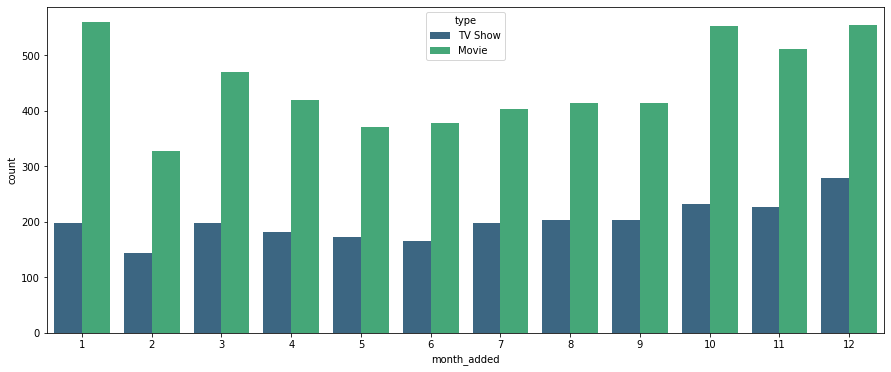

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month_added', hue='type',palette='viridis', data=df, ax=ax)

From the above graph, we can observe that highest movie added in month January, October, and December. And Highest TV show added in the month of December.

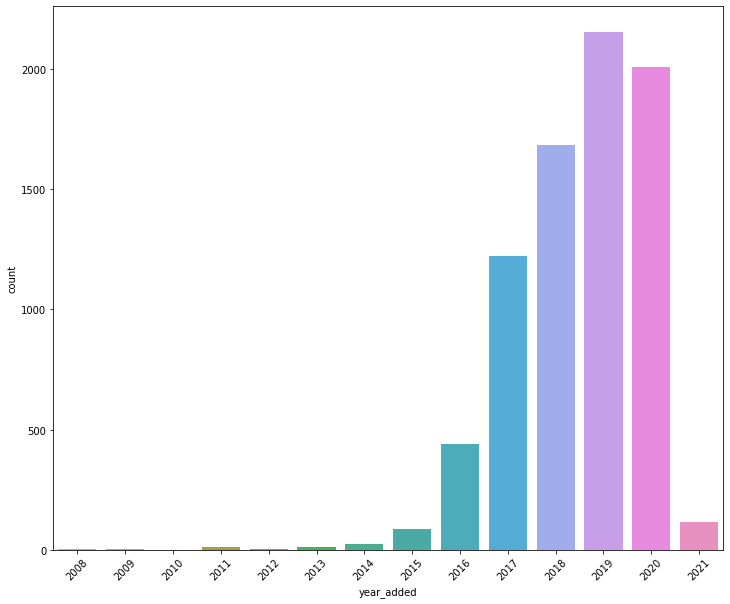

In [ ]:
plt.figure(figsize=(12,10))
ax=sns.countplot(data=df, x='year_added')
plt.xticks(rotation=45)
plt.show()

* 2019 is the year when most of the contents are added in netflix. 

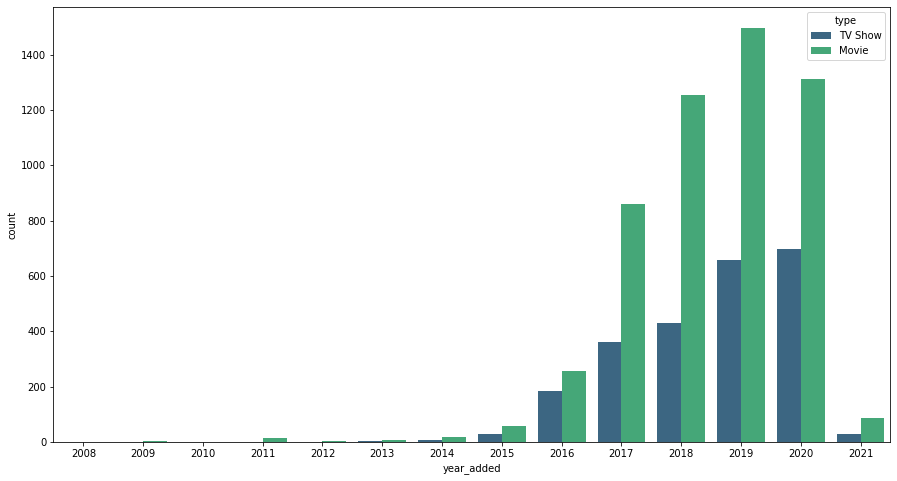

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(x='year_added', hue='type', palette='viridis', data=df, ax=ax)

From this graph, we can observe the trend that there are increament in movie as well as TV shows from year 2017 to 2019. But after 2019, there is decreament in Movie but increament in TV shows.

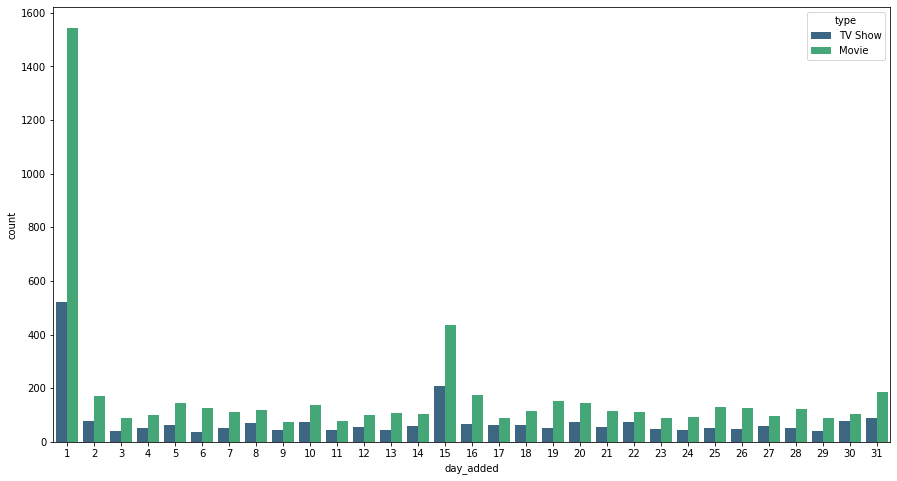

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(x='day_added', hue='type', palette='viridis', data=df, ax=ax)
plt.show()

* From the above graph we can asuume that most of the contents added on the first of the month followed by 15th and 31st.

**Release Year**

Release year is the year in which contents are releases on the netflix.

In [ ]:
df_year = df['release_year'].value_counts().sort_index(ascending=False)

In [ ]:
df_year

2021      31
2020     868
2019     996
2018    1120
2017    1010
        ... 
1945       3
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 73, dtype: int64

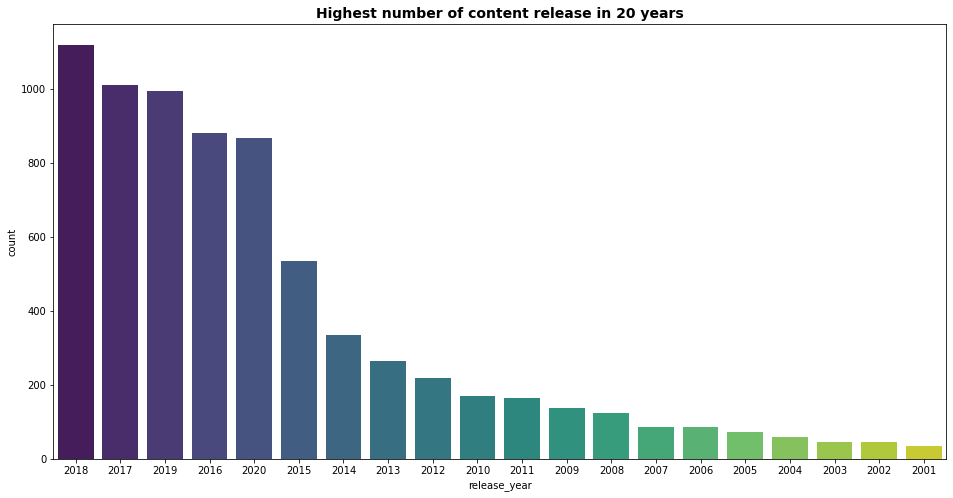

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Highest number of content release in 20 years',size='14', fontweight='bold')
sns.countplot(x='release_year', data=df, palette='viridis', order=df['release_year'].value_counts().index[0:20])

From the above graph, we can observe that in year 2018, most numbers of the content was released and least number of content in the year 2021.

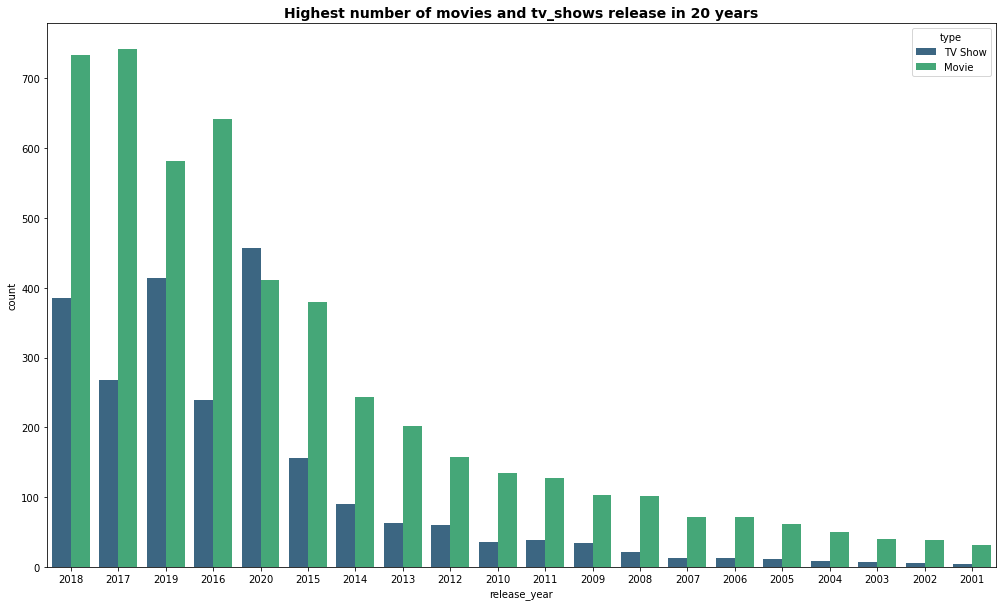

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))
plt.title('Highest number of movies and tv_shows release in 20 years',size='14', fontweight='bold')
sns.countplot(x='release_year', hue='type', palette='viridis', data=df,order=df['release_year'].value_counts().index[0:20])
plt.show()

* From the above graph we can see 2018 is the year in which most no. of the movies are rleased and in 2020 most of the tv_shows are released. 

In [ ]:
df1=df.groupby(['release_year','type']).size().reset_index(name='Count_movies/tv_shows')
df1=df1[df1['release_year']>=2005]
graph= px.line(df1, x="release_year", y="Count_movies/tv_shows", color='type')
graph.update_layout( title={'text': "Production of movies and tv_shows over the years",'y':0.95,'x':0.5})
graph.show()


* Compared to TV series, the quantity of Netflix movies is increasing noticeably more quickly.
* After 2015, we noticed a significant rise in the quantity of films and television programmes.
* After 2020, there is a sharp decline in the volume of films and television programmes made.

* It looks that Netflix has prioritised adding more movie material over TV shows. The growth of movies has been far more pronounced than that of TV shows.

**Ratings**

In [ ]:
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

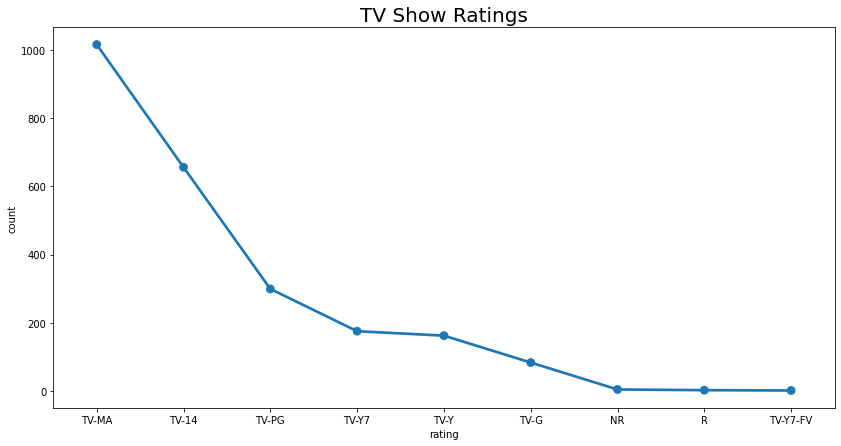

In [ ]:
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig, ax = plt.subplots(figsize=(14,7))  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

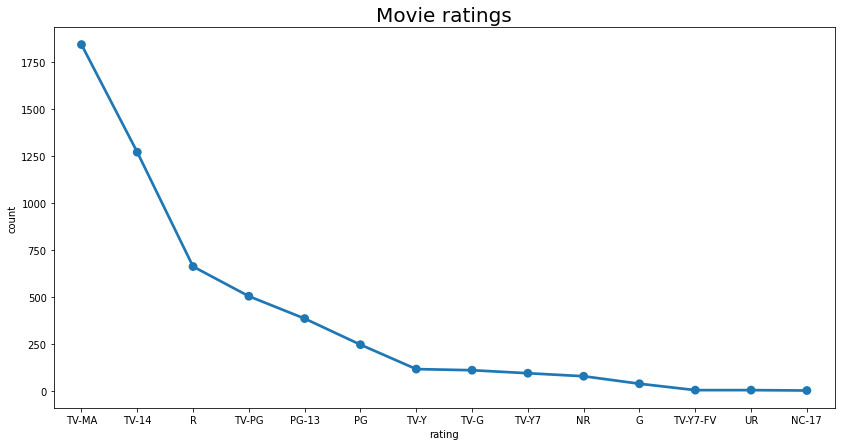

In [ ]:
tv_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig, ax = plt.subplots(figsize=(14,7))  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Movie ratings',size='20')
plt.show()

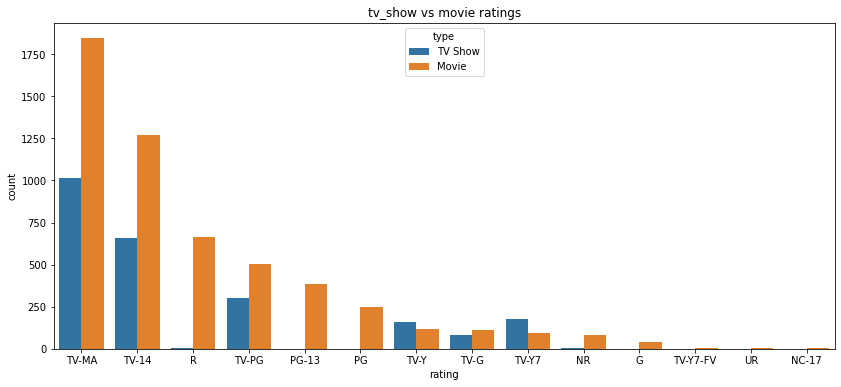

In [ ]:
plt.figure(figsize=(14,6))
plt.title('tv_show vs movie ratings')
sns.countplot(x=df['rating'],hue=df['type'],data=movies,order=movies['rating'].value_counts().index)

* We can see that both movies and tv_shows got the highes rating as TV-MA. TV-MA belongs to mature content, so we can say most poular category belongs to mature conent. 
* Then it is followed by TV-14 and TV-PG and this is belongs to Teen and older kids category.
* Here some contents got least rating belongs to NC-17 and TV-Y7-FV categories.
* Overall conclusion of the above graph is most of the content belongs to mature, teen and older kids categry. 

**Duration**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



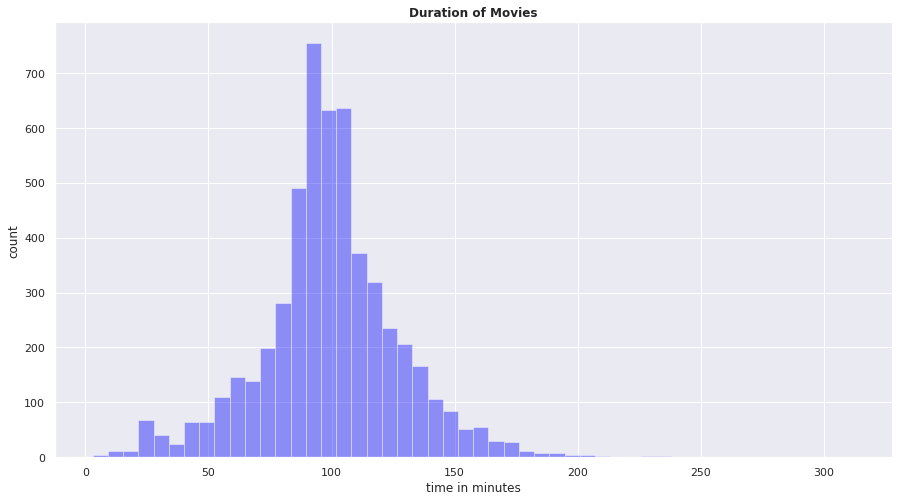

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['blue'])
plt.title('Duration of Movies',fontweight="bold")
plt.xlabel('time in minutes')
plt.ylabel('count')
plt.show()

* For this graph, we can observe that more than 600 movies have duration lies between 80 to 120 minutes.

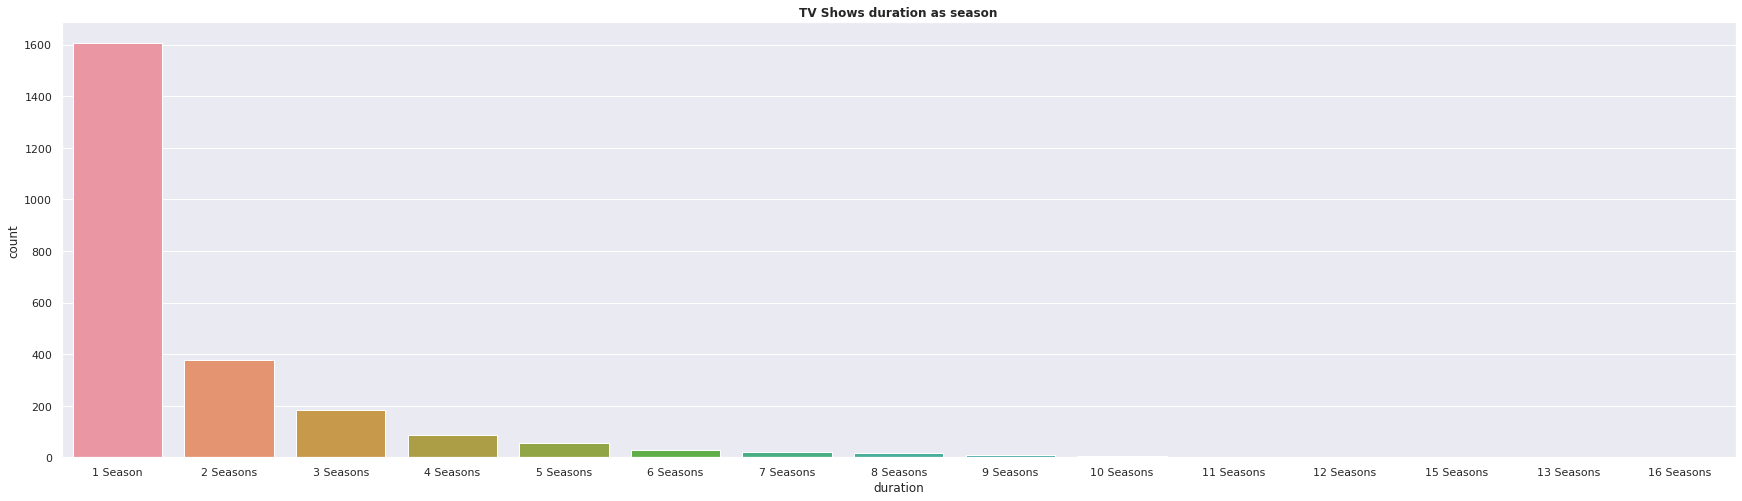

In [ ]:
plt.figure(figsize=(30,8))
plt.title("TV Shows duration as season",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

* From this graph, we can observe that tv shows have only one session are most demanding tv_shows.
* As the number of seasons are increasing interest are decreasing among the viewers.

**Genre**

In [ ]:
df.listed_in.nunique()

491

There are 491 unique values are present in listed_in(genre) and also no null value present.

In [ ]:
listed_in=df.listed_in.value_counts().to_frame()
listed_in.head(20)

,listed_in
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
Kids' TV,204
Children & Family Movies,177
"Documentaries, International Movies",172
"Children & Family Movies, Comedies",169
"Comedies, International Movies",161


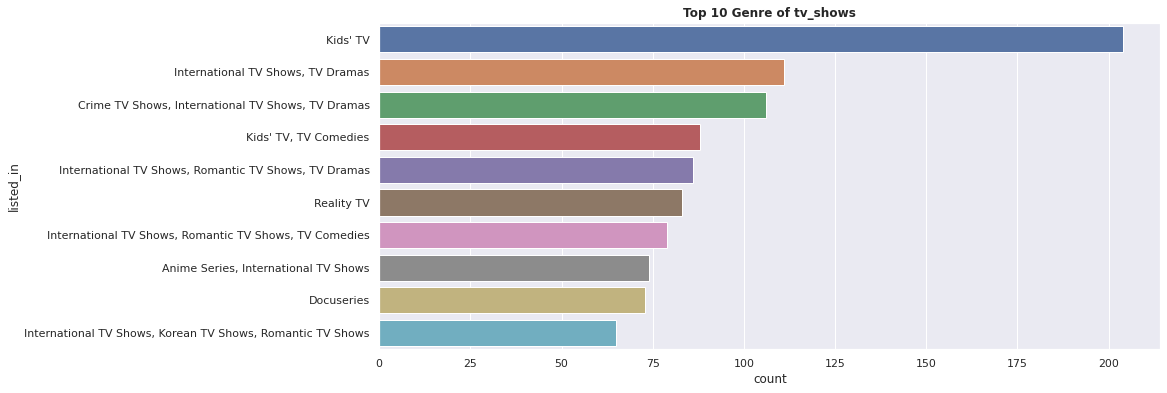

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top 10 Genre of tv_shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])
plt.show()

* From this graph, we can observe that Kid's TV shows have the most number occurring, which is more than 200 times.
* International TV shows, Korean TV shows, and Romantic TV shows have the least number of count that is approx. 60

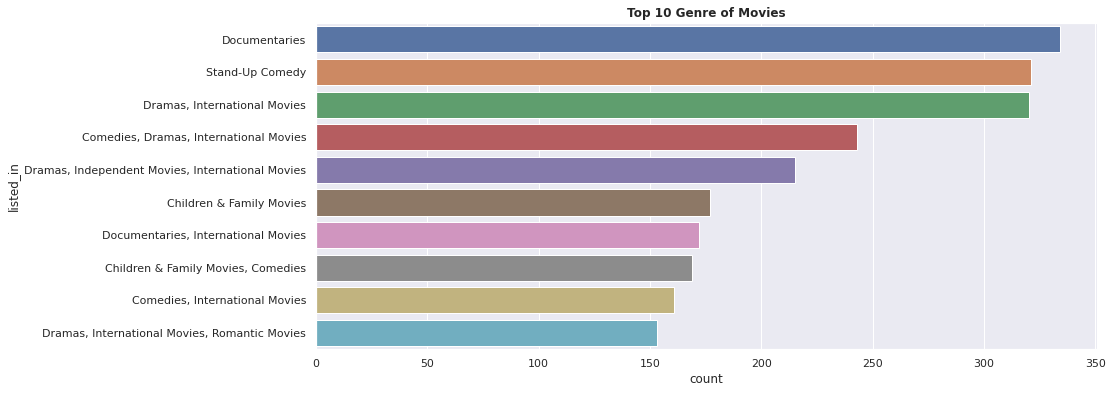

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top 10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])
plt.show()

* From this graph, we can observe that the movies based on Documentaries have the most number of count approx. 330.  
* Standup comedy, Drama, International movies are occurring with the same number which is approx. 310
* Dramas, International movies, and Romantic movies have the least number of occurring which is more than 150.

#Data preprocessing(NLP)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
7785,s7786,TV Show,Zumbo's Just Desserts,not_available,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,31,2020,10
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,1,2020,3


In our dataset title column has all unique and text type.

In [ ]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.title:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

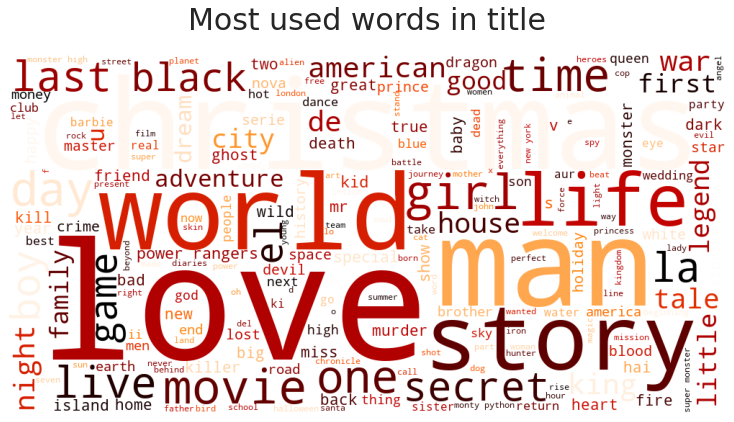

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (10, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

* Most frequent word in title column are love, Christmas, man, girl, world, life etc. 

*  We can conclude that most of the movies and tv_shows release in december so christmas appears most of the time.

**Most used words in cast column**

In [ ]:
# Create a string to store all the words.
cast_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.cast:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    cast_words += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(cast_words)

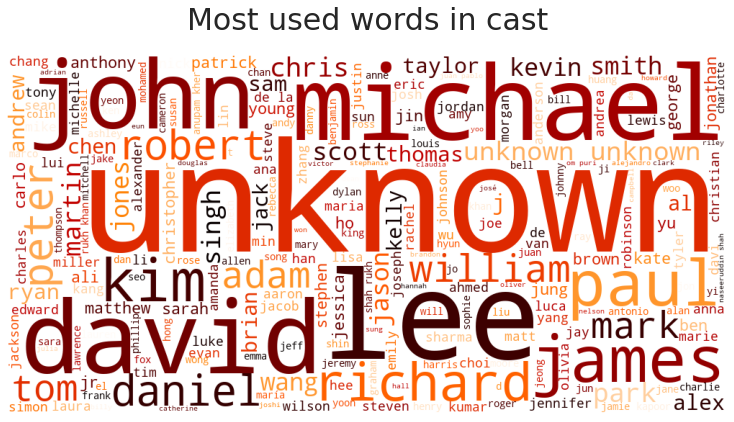

In [ ]:
#plot the WordCloud image                      
plt.figure(figsize = (10, 8), facecolor = None)
plt.title('Most used words in cast', fontsize = 30, pad=25)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

* Here we can see the most number of cast are not available(unknown) in the dataset then Michael, David, John, Lee, James, etc.

**Most used word in description column**

In [ ]:
# Create a string to store all the words.
description_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.description:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    description_words += " ".join(tokens)+" "
 
wordcloud3 = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                contour_width=3, contour_color='steelblue').generate(description_words)

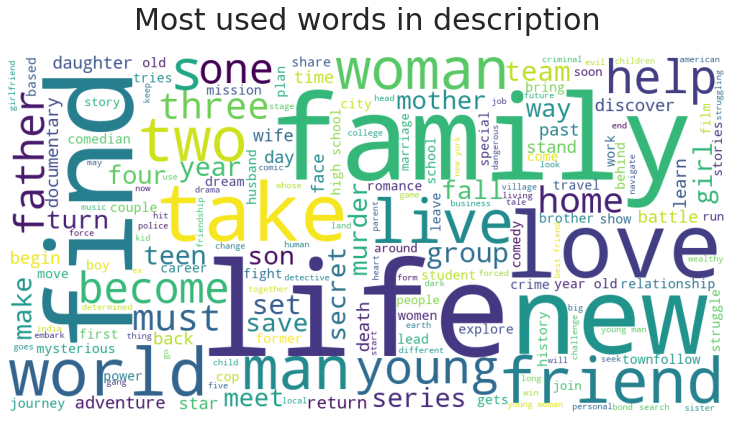

In [ ]:
#plot the WordCloud image                      
plt.figure(figsize = (10, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

* Here we cabn see most of the words in the description of the tv shows and movies are Family, Friend, Love, Life, World, Man, Woman, Father, etc.

**Removing punctuation from Text columns**

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)         
    return text.translate(translator)

In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,not_available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows TV Dramas TV SciFi Fan...,In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,Dramas International Movies,After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,Horror Movies International Movies,When an army recruit is found dead his fellow ...,20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,Action Adventure Independent Movies SciFi Fa...,In a postapocalyptic world ragdoll robots hide...,16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,1,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,International TV Shows TV Dramas TV Mysteries,A genetics professor experiments with a treatm...,1,2017,7
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,Horror Movies International Movies,After an awful accident a couple admitted to a...,1,2020,6
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,1,2019,11
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,Horror Movies International Movies,When a doctor goes missing his psychiatrist wi...,1,2019,4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,Horror Movies International Movies Thrillers,An architect and his wife move into a castle t...,15,2017,12


**Removing Stopwords**

In [ ]:
from nltk.corpus import stopwords
sw=(stopwords.words('english'))
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
df['description'] = df['description'].apply( remove_stopwords)
df['listed_in'] = df['listed_in'].apply(remove_stopwords)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,not_available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,future elite inhabit island paradise far crowd...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,dramas international movies,devastating earthquake hits mexico city trappe...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,horror movies international movies,army recruit found dead fellow soldiers forced...,20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,action adventure independent movies scifi fantasy,postapocalyptic world ragdoll robots hide fear...,16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,dramas,brilliant group students become cardcounting e...,1,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,international tv shows tv dramas tv mysteries,genetics professor experiments treatment comat...,1,2017,7
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,horror movies international movies,awful accident couple admitted grisly hospital...,1,2020,6
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,dramas,one high school students attacks dedicated tea...,1,2019,11
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,horror movies international movies,doctor goes missing psychiatrist wife treats b...,1,2019,4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,horror movies international movies thrillers,architect wife move castle slated become luxur...,15,2017,12


* Stemming

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
df['description'] = df['description'].apply(stemming)
df['listed_in'] = df['listed_in'].apply(stemming)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,not_available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,1,2020,1


**Tf-Idf**



*   In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. 
*  TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

* TfidfVectorizer (after stemming) on listed_in :

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()


In [ ]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [ ]:
len(dictionary)

40

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
#Creating new dataframe
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [ ]:
most_frequent_vocab_top10 = vocab_after_stemming_listed_in.head(10)
most_frequent_vocab_top10

,Word,count
1,tv,39
12,thriller,38
38,teen,37
37,talk,36
36,standup,35
16,sport,34
29,spiritu,33
31,spanishlanguag,32
2,show,31
19,seri,30


In [ ]:
most_frequent_vocab= vocab_after_stemming_listed_in.value_counts().reset_index()             
most_frequent_vocab.rename(columns={'index':'Word', 'vocab_after_stemming_listed_in':'Count'}, inplace=True)
fig = px.bar(vocab_after_stemming_listed_in, x='Word', y='count', text_auto=True,
             color='count')
fig.update_layout(
    title={
        'text': 'Frequenty wise words present in listed_ in column',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()

**TfidfVectorizer (after stemming) on description :**

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer2 = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer2.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary2 = tfid_vectorizer2.vocabulary_.items()


In [ ]:
dictionary2

dict_items([('futur', 5117), ('elit', 4101), ('inhabit', 6475), ('island', 6644), ('paradis', 9338), ('far', 4574), ('crowd', 3133), ('slum', 11662), ('get', 5270), ('one', 9063), ('chanc', 2357), ('join', 6826), ('save', 11019), ('squalor', 11969), ('devast', 3532), ('earthquak', 3991), ('hit', 6024), ('mexico', 8131), ('citi', 2564), ('trap', 12954), ('survivor', 12357), ('walk', 13672), ('life', 7415), ('wait', 13660), ('rescu', 10537), ('tri', 12983), ('desper', 3504), ('stay', 12051), ('aliv', 632), ('armi', 972), ('recruit', 10381), ('found', 4954), ('dead', 3328), ('fellow', 4664), ('soldier', 11760), ('forc', 4907), ('confront', 2853), ('terrifi', 12627), ('secret', 11149), ('that', 12658), ('haunt', 5801), ('jungl', 6897), ('train', 12934), ('camp', 2131), ('postapocalypt', 9813), ('world', 13990), ('ragdol', 10200), ('robot', 10730), ('hide', 5944), ('fear', 4633), ('danger', 3274), ('machin', 7693), ('extermin', 4484), ('brave', 1843), ('newcom', 8722), ('group', 5561), ('br

In [ ]:
len(dictionary2)

14234

In [ ]:
# Lists to store the vocab and counts
vocab2 = []
count_of_vocab2 = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary2:
    vocab2.append(key)
    count_of_vocab2.append(value)

In [ ]:
#Creating new dataframe
vocab_after_stemming_description = pd.DataFrame({"Words": vocab2 , "counts" :count_of_vocab2})
# Sort the dataframe by count
vocab_after_stemming_description = vocab_after_stemming_description.sort_values("counts" ,ascending=False)

In [ ]:
most_frequent_words = vocab_after_stemming_description.head(50)

In [ ]:
most_frequent_vocab2= vocab_after_stemming_description.value_counts().reset_index().head(10)            
most_frequent_vocab2.rename(columns={'index':'Words', 'most_frequent_vocab2':'Count'}, inplace=True)
fig = px.bar(most_frequent_words, x='Words', y='counts', text_auto=True,
             color='counts')
fig.update_layout(
    title={
        'text': 'Frequenty wise words present in description column',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()

**Applying Clustring**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,not_available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,1,2020,1


In [ ]:
df.shape

(7770, 15)

*  Here, we create clusters of text columns of our data set so that we can apply TfIdf Vectorizer on clustered data (document).  
*  After that TfidfVectorizer weights the word counts by a measure of how often they appear in the document.

In [ ]:
new_df = df[['type']].copy()
new_df['clustered_data'] = (df['description'] + ' ' + df['listed_in']).astype(str)
new_df.head()

,type,clustered_data
0,TV Show,futur elit inhabit island paradis far crowd sl...
1,Movie,devast earthquak hit mexico citi trap survivor...
2,Movie,armi recruit found dead fellow soldier forc co...
3,Movie,postapocalypt world ragdol robot hide fear dan...
4,Movie,brilliant group student becom cardcount expert...


In [ ]:
#creating documents for TfIdf Vectorization
documents = new_df.clustered_data

In [ ]:
tfIdf_model = TfidfVectorizer(max_features=5000)                 # only consider top 5000 features.
wt_words= tfIdf_model.fit_transform(documents)

In [ ]:
wt_words.shape

(7770, 5000)

**Applying PCA for dimensionality reduction**

*   Using PCA for dimentionality reduction. PCA reduces data by geometrically projecting them onto lower dimensions called principal components (PCs), with the goal of finding the best summary of the data using a limited number of PCs. 

In [ ]:
X = wt_words.toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Principal Components", "y": "Explained Variance"}
)

*  Here we can see almost 95% of variance is explained by aprox. 3000 component.
*  So we take 95% to select aprox. 3000 principal components.

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

(7770, 3100)

**Applying k-Means Algorithm**

At first we use elbow method to find optimum value of k.

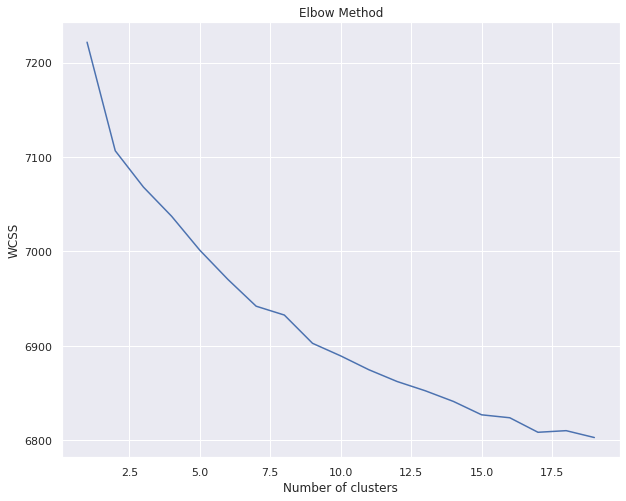

In [ ]:
#from sklearn.cluster import KMeans
plt.figure(figsize=(10,8))
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')               #within cluster sum of square
plt.show()

* The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
silhouette_scores = []
for n_clusters in range(2,16):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_transformed)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_transformed, preds)
    silhouette_scores.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.011523951632272928
For n_clusters = 3, silhouette score is 0.012351833421796805
For n_clusters = 4, silhouette score is 0.013517142906852339
For n_clusters = 5, silhouette score is 0.01413855258964913
For n_clusters = 6, silhouette score is 0.012555806205267394
For n_clusters = 7, silhouette score is 0.01608135671796184
For n_clusters = 8, silhouette score is 0.01383775008860491
For n_clusters = 9, silhouette score is 0.015736880664001158
For n_clusters = 10, silhouette score is 0.01467076253219752
For n_clusters = 11, silhouette score is 0.016104934491359024
For n_clusters = 12, silhouette score is 0.012633198241391048
For n_clusters = 13, silhouette score is 0.01615824814185428
For n_clusters = 14, silhouette score is 0.011622738301496795
For n_clusters = 15, silhouette score is 0.011714774058574816


For n_clusters = 2, silhouette score is 0.011523951632272928


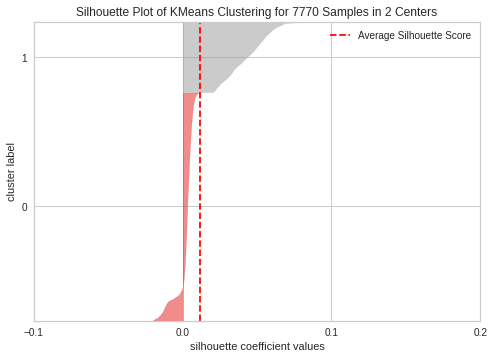

For n_clusters = 3, silhouette score is 0.013473363655607754


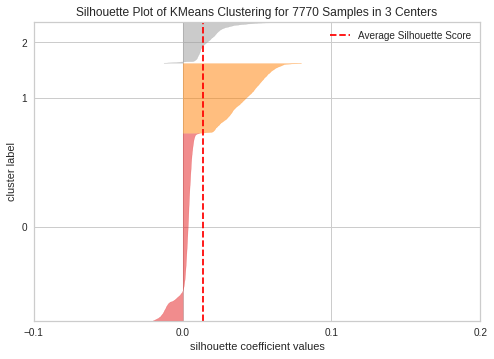

For n_clusters = 4, silhouette score is 0.013508841141904515


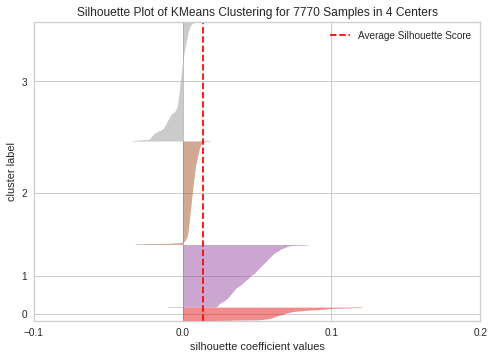

For n_clusters = 5, silhouette score is 0.014254157083373308


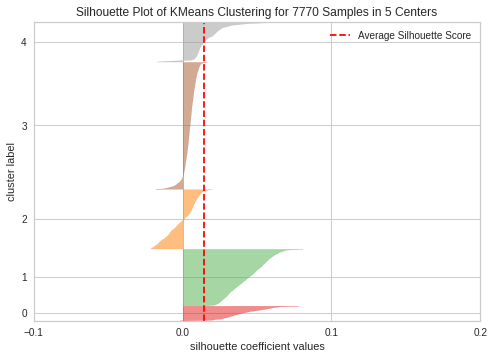

For n_clusters = 6, silhouette score is 0.012278326432407881


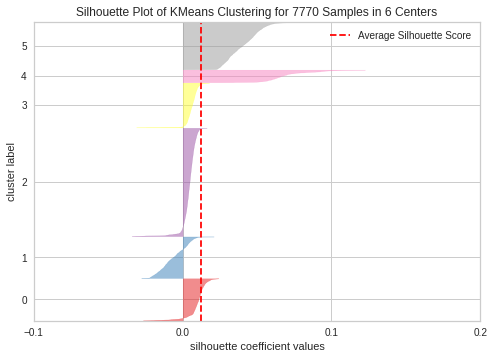

For n_clusters = 7, silhouette score is 0.014149564374904272


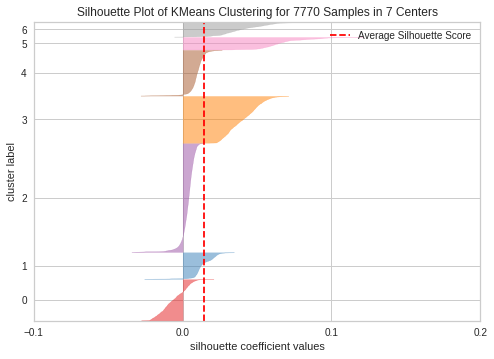

For n_clusters = 8, silhouette score is 0.014229102213742763


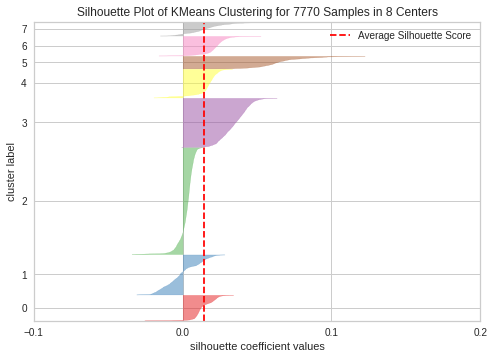

For n_clusters = 9, silhouette score is 0.01564656157149675


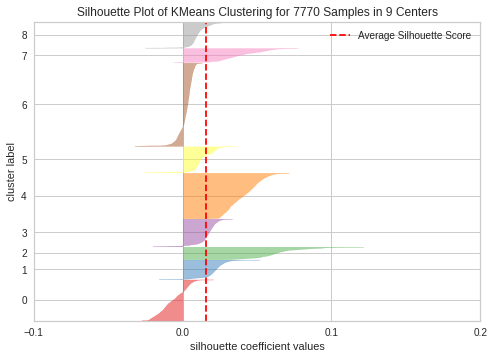

For n_clusters = 10, silhouette score is 0.015986424374796207


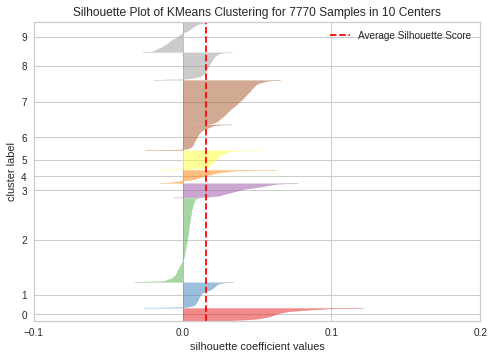

For n_clusters = 11, silhouette score is 0.011370867289648767


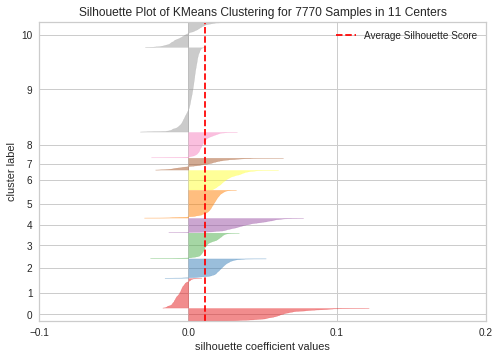

For n_clusters = 12, silhouette score is 0.013136236478473144


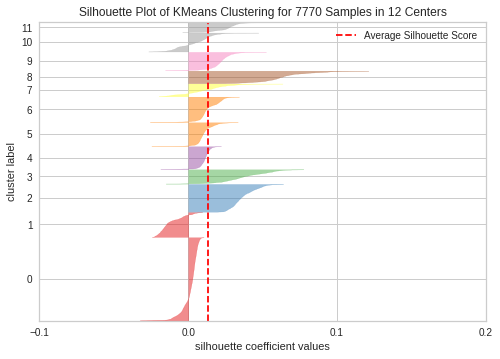

For n_clusters = 13, silhouette score is 0.015789866539361982


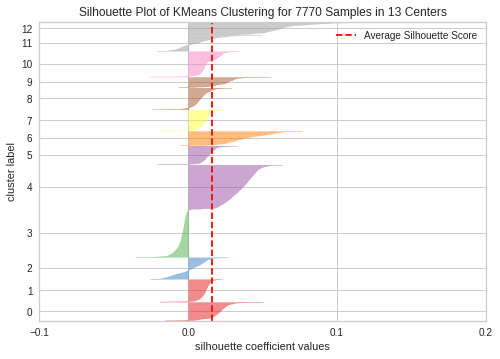

For n_clusters = 14, silhouette score is 0.015827452742509053


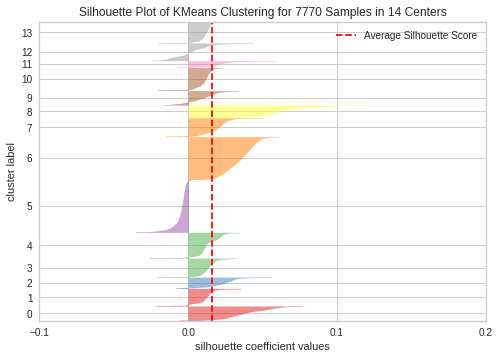

For n_clusters = 15, silhouette score is 0.011248961048510463


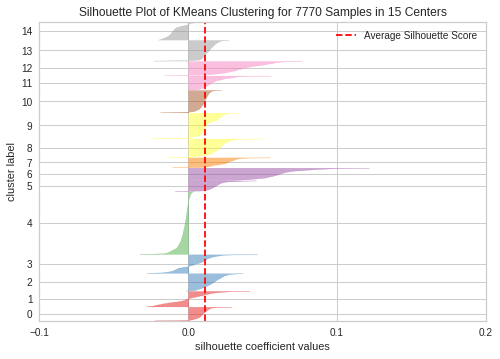

In [ ]:
for n_clusters in range(2,16):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data  

* To analyze this clusters, we need to look at the value of the silhouette coefficient (or score), its best value is closer to 1. The average value we have is marked by the red vertical line.

* We also need to look at the distribution between clusters, a good plot has similar sizes of clustered areas or well-distributted points.

* So after analysing all plots we choose the n_cluster=11 since plots are well distributed.

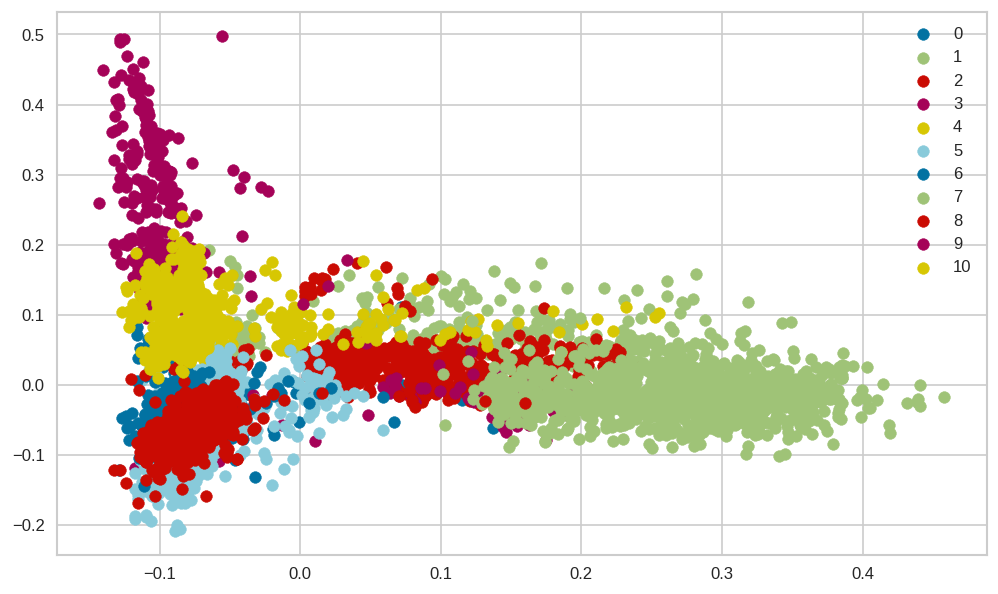

In [ ]:
plt.figure(figsize=(10,6), dpi = 120)
kmeans= KMeans(n_clusters=11, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)


plt.legend()
plt.show()

**INFERENCE**

* In this given dataset of Netflix there are total of 7787 rows and 12 columns.
* There are some null values present in some features like director, cast, country, data added, release year and rating.
* After analysing netflix dataset, it shows 5372 movies  and 2398 tv_shows.
* There are more number of movies than tv_shows present on netflix.
* In USA number of content released or added is highest followed by india.
* Most of the content were added in 2019 on netfix. We can also obserb that most of the movies were added in 2019 and tv_shows in 2020.
* After year 2018 the popularity of tv_shows increases with respect to movies.


* TV-MA has the highest rating for both movies and tv_shows which shows that mature and teen content is most popular on netflix. Least rating for tv_shows is TV-y7FV and movie is NC-17 which is a adult category.
* The highest duration of the movies lies between 80 to 120 minutes and most of the popular tv_shows having only 1 season.
* After that we use NLP on the text columns of our dataset in which we perform punctuation removal, removing of stopwords and then stemming.
* After doing all that we do Tf-Idf on listed_in(genre) and description column.
* So we can conclude that frequent words of listed_in are tv, thriller, teen and least frequent words are adventure, action. So the popularity of tv_shows is higher than any genre of the movies. in movies most poular genere is thriller followed by teen.

* We apply Tf-Idf on clustered data which is corpus of words. Then we do PCA for dimensionality reduction.

* Then we apply clustring. For finding optimum value of k we use Elbow method and silhouette method. After that we apply clustring so that we obtain the best clustring arrangement.

* From all the analysis we have done, we can improve the future content quality of the netflix i.e which type of content is popular among the citizens and of which genre  and duration etc.

**Future Scope**

* From EDA part we can use analysed information to reduce the churn rate by making more suitable content for any individual customer and this can increase the economical growth of the Netflix. 

*  Clustring analysis of this dataset can be usefull for creating movie recommender system.